In [1]:
using PyPlot
include("Taylor.jl")
using ADT
using ODE

### Función del pédulo paramétrico

In [2]:
function ec1(t, x̄)
    
    dx = x̄[2]
    dy = (α + β * cos(t)) * sin(x̄[1])
    
    return [dx; dy]
end

ec1 (generic function with 1 method)


### Varibles

In [3]:
x̄ = [1.0, 0.0]
t0 = 0.0
tf = 50 * pi

α = 1.0
β = 0.0 #Si beta es cero nos encontramos con el caso del oscilador armónico

t = linspace(t0, tf, 1000)#Arreglo con valores aletorios de t entre t0 y tf

1000-element LinSpace{Float64}:
 0.0,0.157237,0.314474,0.471711,0.628947,…,156.608,156.765,156.922,157.08

Usamos la paqueteria ODE para resolver la ecuación y graficar el resultado

In [4]:
(t1, sol1) = ode45(ec1, x̄, t);#=4th order adaptive solver with 5th order error control,
using the Dormand Prince coefficients. Fehlberg and
Cash-Karp coefficients are also available.=#

([0.0,0.041209,0.157237,0.263002,0.314474,0.471711,0.586001,0.628947,0.786184,0.943421  …  156.136,156.292,156.293,156.451,156.608,156.611,156.765,156.922,156.93,157.08],Array{Float64,1}[[1.0,0.0],[1.00071,0.0346815],[1.01041,0.132605],[1.02919,0.222671],[1.04179,0.266943],[1.09453,0.404593],[1.14662,0.507415],[1.16926,0.546766],[1.26675,0.694248],[1.38781,0.846576]  …  [2.52822,-1.64769],[2.27874,-1.54284],[2.27701,-1.54199],[2.0446,-1.41152],[1.83397,-1.26496],[1.8301,-1.26199],[1.64721,-1.11024],[1.48497,-0.953091],[1.47808,-0.945863],[1.34736,-0.797901]])

In [5]:
x1 = map(y -> y[1], sol1)
y1 = map(y -> y[2], sol1);

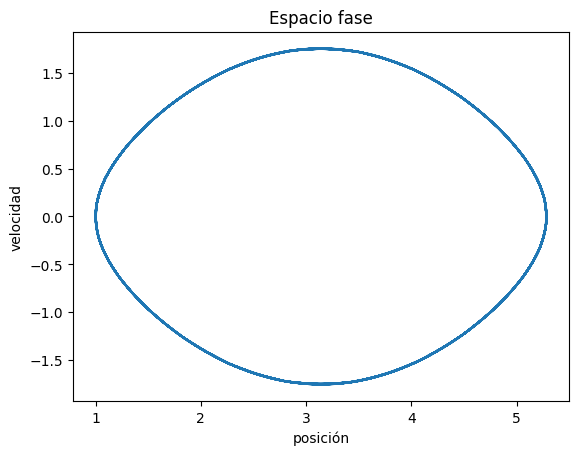

PyObject <matplotlib.text.Text object at 0x7fce73d171d0>

In [6]:
plot(x1, y1)
xlabel("posición")
ylabel("velocidad")
title("Espacio fase")

Ahora usamos el integrador de Taylor. 

In [7]:
(t2, sol2) = integradorT2(ec1, t0, tf, x̄, 10000, 1e-50);

Integracion terminada
#T = 9743, #X̄ = 9743, n = 9743 / 10000


In [8]:
sol2

9743-element Array{Array{Float64,1},1}:
 [1.0,0.0]          
 [1.00016,0.0164688]
 [1.00071,0.0345208]
 [1.00165,0.0526388]
 [1.00298,0.0708887]
 [1.00474,0.0893964]
 [1.00699,0.108597] 
 [1.00964,0.127598] 
 [1.01259,0.14585]  
 [1.01585,0.163739] 
 [1.01943,0.181383] 
 [1.02332,0.198844] 
 [1.02752,0.216159] 
 ⋮                  
 [1.50531,-0.974541]
 [1.48995,-0.958693]
 [1.47485,-0.942875]
 [1.45999,-0.927065]
 [1.44535,-0.911241]
 [1.4309,-0.895388] 
 [1.41664,-0.879491]
 [1.40254,-0.863532]
 [1.38861,-0.847494]
 [1.37482,-0.831355]
 [1.36115,-0.815088]
 [1.34756,-0.798649]

In [9]:
x2 = map(y -> y[1], sol2)
y2 = map(y -> y[2], sol2);

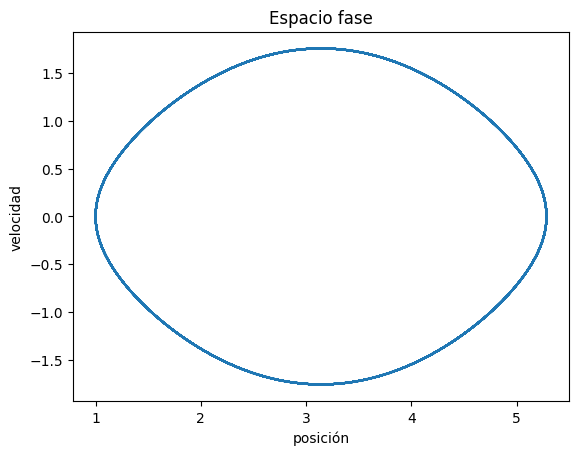

PyObject <matplotlib.text.Text object at 0x7fce73d7c780>

In [10]:
plot(x2, y2)
# xlim(-0.8, -0.7)
# ylim(-0.25, 0.25)
xlabel("posición")
ylabel("velocidad")
title("Espacio fase")

A continuación veremos cómo varian las soluciones con diferentes valores de α y β

In [11]:
#Creamos arreglos para alfa y beta entre 0 y 10 (como aparece en la referencia)
α1 = linspace(0, 10, 1000)
β1 = linspace(0, 10, 1000)

1000-element LinSpace{Float64}:
 0.0,0.01001,0.02002,0.03003,0.04004,…,9.95996,9.96997,9.97998,9.98999,10.0

In [13]:
solucion=zeros(1000,1000) #Matriz de soluciones

for i=1:1000
    for j=1:1000
        α=α1[i+1]
        β=β1[j]
        integradorT2(ec1, t0, tf, x̄, 10000, 1e-50)
        solucion[i:i,j:j] = sol2 
        
    end
end
solucion

Integracion terminada
#T = 991, #X̄ = 991, n = 991 / 10000


LoadError: DimensionMismatch("tried to assign 9743-element array to 1×1 destination")

In [ ]:
xgrid = repmat(α1',1000,1);
ygrid = repmat(β1,1,1000);

cuadricula = 2
gamma_de_color = ColorMap("plasma") #https://matplotlib.org/examples/color/colormaps_reference.html
transparencia = 0.8
grosor_de_linea = 0.25
altura = 2
dimensiones = 1

fig = figure("pyplot_surfaceplot",figsize=(10,10))
ax = fig[:add_subplot](altura,dimensiones,1, projection = "3d")
ax[:plot_surface](xgrid, ygrid,solucion, rstride=cuadricula,edgecolors="k", cstride=cuadricula, cmap=gamma_de_color, alpha=transparencia, linewidth=grosor_de_linea)
xlabel("Eje X")
ylabel("Eje Y")
title("Gráfica de la superficie")